In [29]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import nbaShotCharts as nba

sns.set_style('white')

In [30]:
harden = pd.read_csv("harden_shots.csv")

In [31]:
from scipy.stats import binned_statistic_2d

In [32]:
bins = 20

In [33]:
mean, xedges, yedges, binnumber = binned_statistic_2d(x=harden.LOC_X,
                                                       y=harden.LOC_Y,
                                                       values=harden.SHOT_MADE_FLAG,
                                                       statistic='mean',
                                                       bins=bins)

In [34]:
cmap1 = plt.cm.YlOrRd

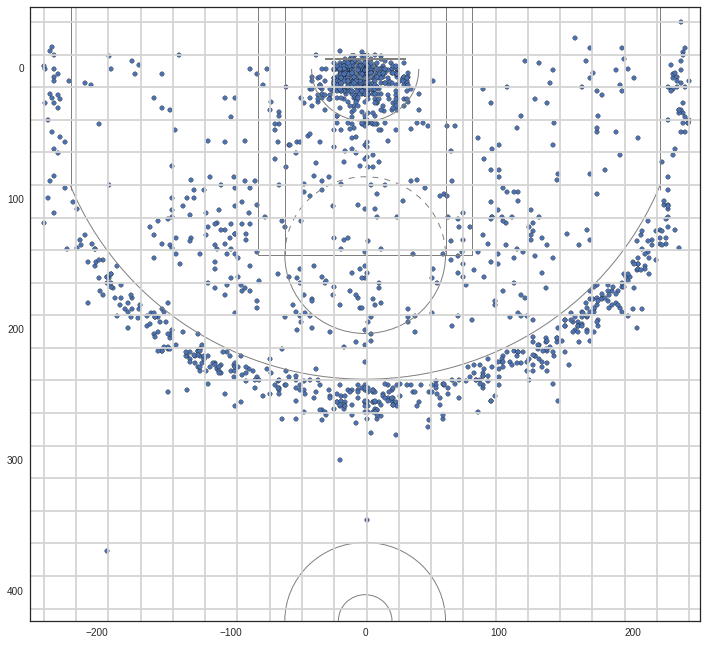

In [35]:
fig, ax = plt.subplots(figsize=(12,11))

for edge in xedges:
    ax.vlines(edge, -47.5, 422.5, 'lightgray')
    
for edge in yedges:
    ax.hlines(edge, -250, 250, 'lightgray')
    
ax.scatter(harden.LOC_X, harden.LOC_Y)
    
ax.set_ylim(422.5, -47.5)
ax.set_xlim(-250, 250)
nba.draw_court(ax, lw=1)
    
plt.show()

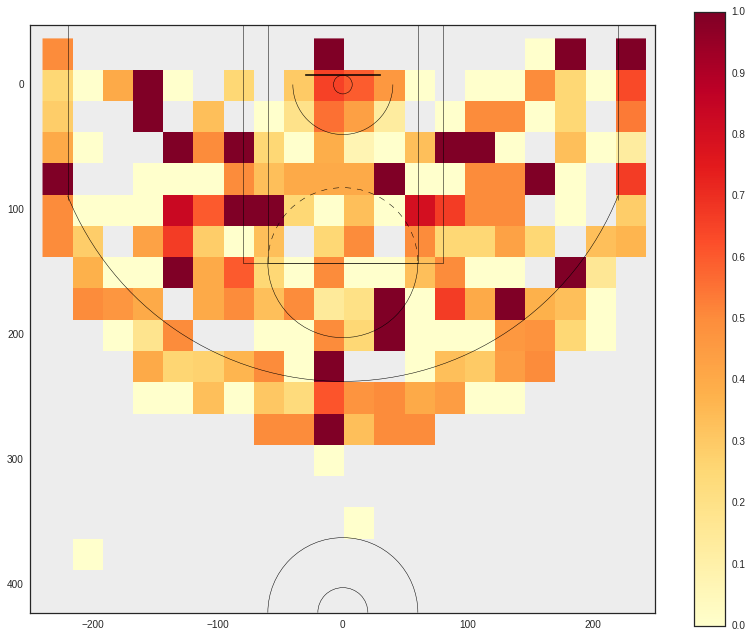

In [36]:
fig, ax = plt.subplots(figsize=(14,11))

ax.set_ylim(422.5, -47.5)
ax.set_xlim(-250, 250)
nba.draw_court(ax, lw=0.5, color='black')
ax.patch.set_facecolor('lightgray')
ax.patch.set_alpha(0.4)

im = ax.imshow(mean.T, origin='lower',
          extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
          interpolation='nearest', cmap=plt.cm.YlOrRd)
          
ax.invert_yaxis

fig.colorbar(im)

plt.show()

In [37]:
type(im)

matplotlib.image.AxesImage

###Create a Hexbin plot

https://stackoverflow.com/questions/12200693/python-pandas-how-to-assign-groupby-operation-results-back-to-columns-in-parent?rq=1

In [38]:
harden.head()

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG
0,Shot Chart Detail,21400003,18,201935,James Harden,1610612745,Houston Rockets,1,9,58,...,Jump Shot,3PT Field Goal,Right Corner 3,Right Side(R),24+ ft.,22,226,39,1,0
1,Shot Chart Detail,21400003,39,201935,James Harden,1610612745,Houston Rockets,1,8,25,...,Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,2,-15,15,1,0
2,Shot Chart Detail,21400003,41,201935,James Harden,1610612745,Houston Rockets,1,8,21,...,Jump Shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,25,-232,110,1,1
3,Shot Chart Detail,21400003,95,201935,James Harden,1610612745,Houston Rockets,1,4,32,...,Jump Shot,2PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,19,-146,135,1,0
4,Shot Chart Detail,21400003,120,201935,James Harden,1610612745,Houston Rockets,1,2,38,...,Driving Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,2,-8,22,1,1


In [39]:
# add bin number column
harden["BIN"] = binnumber

In [40]:
len(np.unique(binnumber))

188

In [41]:
harden.head()

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,BIN
0,Shot Chart Detail,21400003,18,201935,James Harden,1610612745,Houston Rockets,1,9,58,...,3PT Field Goal,Right Corner 3,Right Side(R),24+ ft.,22,226,39,1,0,444
1,Shot Chart Detail,21400003,39,201935,James Harden,1610612745,Houston Rockets,1,8,25,...,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,2,-15,15,1,0,223
2,Shot Chart Detail,21400003,41,201935,James Harden,1610612745,Houston Rockets,1,8,21,...,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,25,-232,110,1,1,28
3,Shot Chart Detail,21400003,95,201935,James Harden,1610612745,Houston Rockets,1,4,32,...,2PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,19,-146,135,1,0,95
4,Shot Chart Detail,21400003,120,201935,James Harden,1610612745,Houston Rockets,1,2,38,...,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,2,-8,22,1,1,223


In [42]:
harden = harden.join(harden.groupby("BIN")["SHOT_MADE_FLAG"].mean(),
             on="BIN", rsuffix="_AVG")

In [43]:
harden.head()

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,BIN,SHOT_MADE_FLAG_AVG
0,Shot Chart Detail,21400003,18,201935,James Harden,1610612745,Houston Rockets,1,9,58,...,Right Corner 3,Right Side(R),24+ ft.,22,226,39,1,0,444,0.125000
1,Shot Chart Detail,21400003,39,201935,James Harden,1610612745,Houston Rockets,1,8,25,...,Restricted Area,Center(C),Less Than 8 ft.,2,-15,15,1,0,223,0.557377
2,Shot Chart Detail,21400003,41,201935,James Harden,1610612745,Houston Rockets,1,8,21,...,Above the Break 3,Left Side Center(LC),24+ ft.,25,-232,110,1,1,28,0.500000
3,Shot Chart Detail,21400003,95,201935,James Harden,1610612745,Houston Rockets,1,4,32,...,Mid-Range,Left Side Center(LC),16-24 ft.,19,-146,135,1,0,95,0.428571
4,Shot Chart Detail,21400003,120,201935,James Harden,1610612745,Houston Rockets,1,2,38,...,Restricted Area,Center(C),Less Than 8 ft.,2,-8,22,1,1,223,0.557377


In [44]:
# rename new column
harden.rename(columns={"SHOT_MADE_FLAG_AVG":"BIN_AVG"},
              inplace=True)

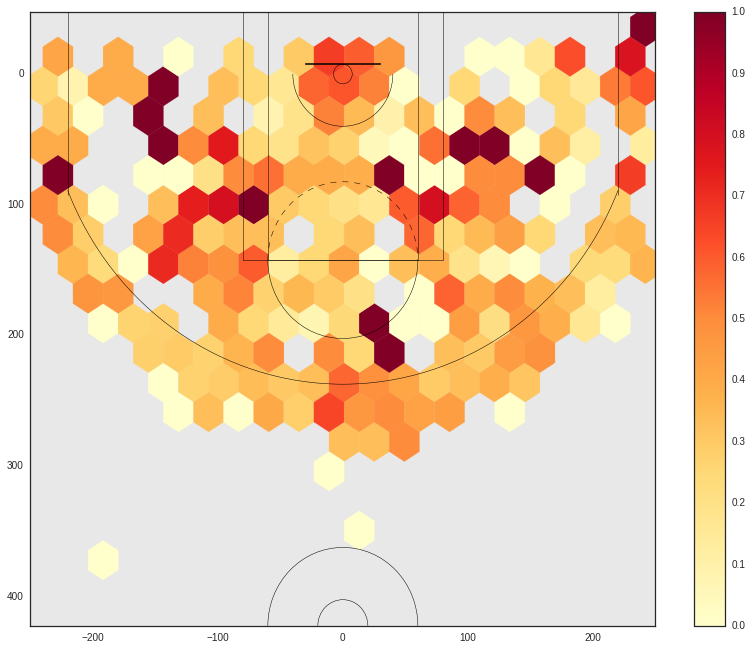

In [45]:
fig, ax = plt.subplots(figsize=(14,11))

hexbin = ax.hexbin(harden.LOC_X, harden.LOC_Y, harden.BIN_AVG,
           cmap=cmap1, gridsize=bins)
          
ax.set_ylim(422.5, -47.5)
ax.set_xlim(-250, 250)
nba.draw_court(ax, lw=0.5, color="black")
ax.patch.set_facecolor('lightgray')
ax.patch.set_alpha(0.5)

fig.colorbar(hexbin)

plt.show()

###Try to adjust hexbin size based on number of shots per bin 

In [46]:
harden = harden.join(harden.groupby("BIN")["BIN_AVG"].count(),
             on="BIN", rsuffix="_COUNT")

harden.head()

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,BIN,BIN_AVG,BIN_AVG_COUNT
0,Shot Chart Detail,21400003,18,201935,James Harden,1610612745,Houston Rockets,1,9,58,...,Right Side(R),24+ ft.,22,226,39,1,0,444,0.125000,8
1,Shot Chart Detail,21400003,39,201935,James Harden,1610612745,Houston Rockets,1,8,25,...,Center(C),Less Than 8 ft.,2,-15,15,1,0,223,0.557377,61
2,Shot Chart Detail,21400003,41,201935,James Harden,1610612745,Houston Rockets,1,8,21,...,Left Side Center(LC),24+ ft.,25,-232,110,1,1,28,0.500000,4
3,Shot Chart Detail,21400003,95,201935,James Harden,1610612745,Houston Rockets,1,4,32,...,Left Side Center(LC),16-24 ft.,19,-146,135,1,0,95,0.428571,7
4,Shot Chart Detail,21400003,120,201935,James Harden,1610612745,Houston Rockets,1,2,38,...,Center(C),Less Than 8 ft.,2,-8,22,1,1,223,0.557377,61


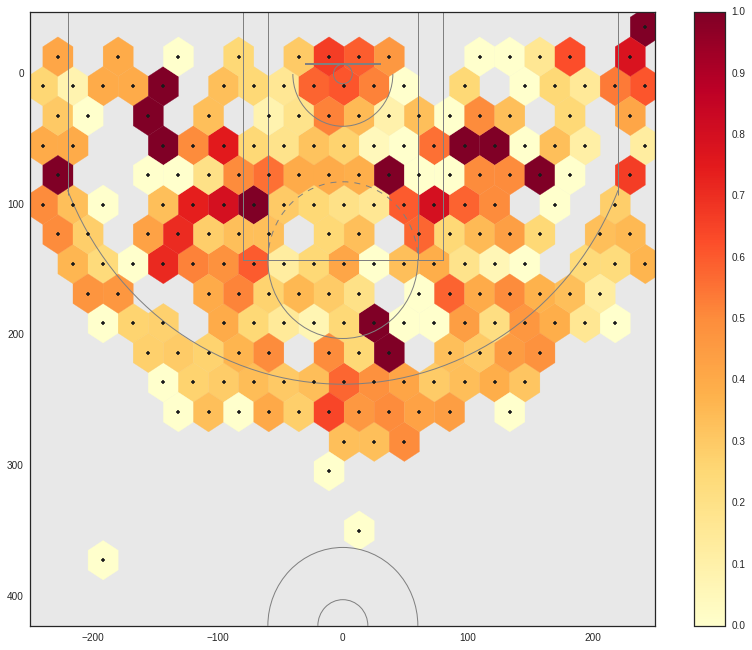

In [47]:
fig, ax = plt.subplots(figsize=(14,11))

hexbin = ax.hexbin(harden.LOC_X, harden.LOC_Y, harden.BIN_AVG,
           cmap=cmap1, gridsize=bins, mincnt=0)
          
ax.set_ylim(422.5, -47.5)
ax.set_xlim(-250, 250)
nba.draw_court(ax, lw=1)
ax.patch.set_facecolor('lightgray')
ax.patch.set_alpha(0.5)

counts = hexbin.get_array()
verts = hexbin.get_offsets()


for offc in range(verts.shape[0]):
    binx,biny = verts[offc][0],verts[offc][1]
#     if counts[offc]:
    ax.plot(binx,biny,'k.',zorder=100)
        
# for x in range(len(b)):
#     xav=np.mean(b[x].vertices[0:6,0]) #center in x (RA)
#     yav=np.mean(b[x].vertices[0:6,1]) #center in y (DEC)
#     plt.plot(xav,yav,'k.',zorder=100)

fig.colorbar(hexbin)

plt.show()

In [48]:
hex_coord = pd.DataFrame(verts, columns=['x', 'y'])
hex_coord["FGP"] = counts

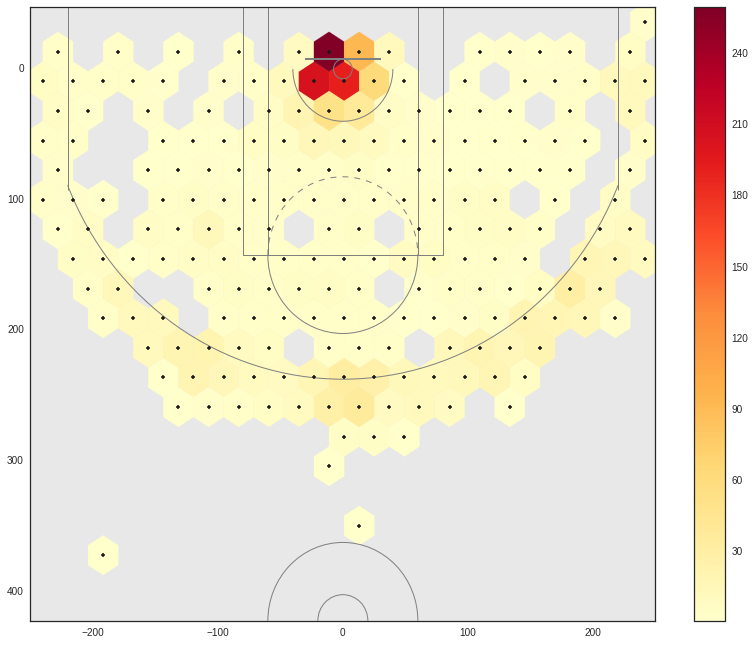

In [49]:
fig, ax = plt.subplots(figsize=(14,11))

hexbin = ax.hexbin(harden.LOC_X, harden.LOC_Y, harden.BIN_AVG_COUNT,
           cmap=cmap1, gridsize=bins)
          
ax.set_ylim(422.5, -47.5)
ax.set_xlim(-250, 250)
nba.draw_court(ax, lw=1)
ax.patch.set_facecolor('lightgray')
ax.patch.set_alpha(0.5)

counts = hexbin.get_array()
verts = hexbin.get_offsets()


for offc in range(verts.shape[0]):
    binx,biny = verts[offc][0],verts[offc][1]
#     if counts[offc]:
    ax.plot(binx,biny,'k.',zorder=100)
        
# for x in range(len(b)):
#     xav=np.mean(b[x].vertices[0:6,0]) #center in x (RA)
#     yav=np.mean(b[x].vertices[0:6,1]) #center in y (DEC)
#     plt.plot(xav,yav,'k.',zorder=100)

fig.colorbar(hexbin)

plt.show()

In [50]:
hex_coord["Shot_Count"] = counts

In [51]:
hex_coord.head()

,x,y,FGP,Shot_Count
0,-240.0,9.363636,0.255102,7.857143
1,-240.0,54.727273,0.400000,5.000000
2,-240.0,100.090909,0.500000,4.000000
3,-215.9,9.363636,0.083333,4.000000
4,-215.9,54.727273,0.400000,5.000000


In [52]:
hex_max = hex_coord.Shot_Count.max()

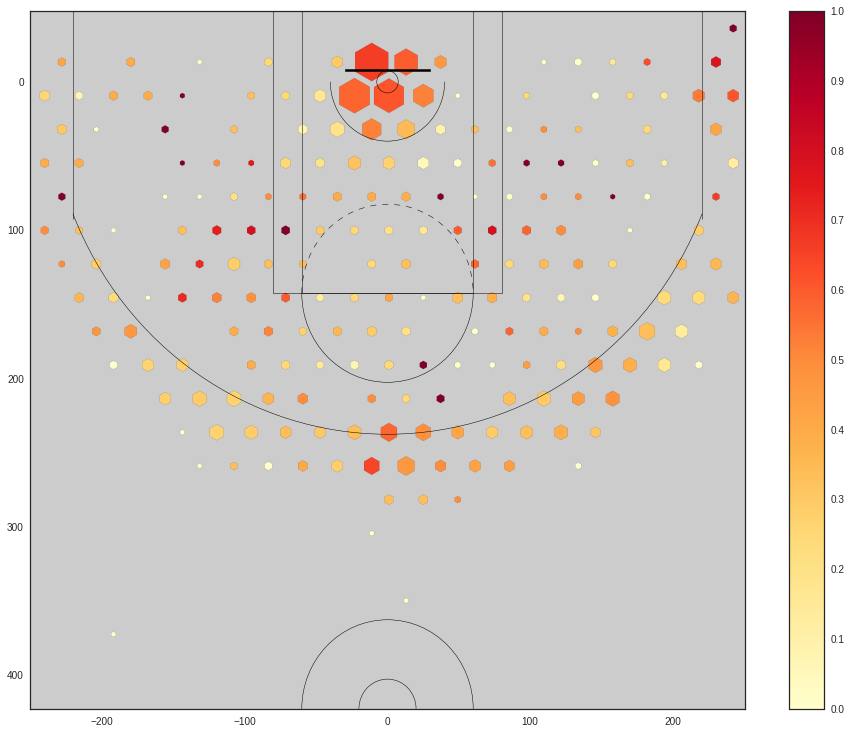

In [53]:
fig, ax = plt.subplots(figsize=(16,12.5))


scatter = ax.scatter(hex_coord.x, hex_coord.y, c=hex_coord.FGP,
                     s=30*(hex_coord.Shot_Count**0.7), cmap=plt.cm.YlOrRd,
                     alpha=1, marker='h', lw=0.1)
          
ax.set_ylim(422.5, -47.5)
ax.set_xlim(-250, 250)
nba.draw_court(ax, lw=0.5, color='black')
ax.patch.set_facecolor('gray')
ax.patch.set_alpha(0.4)
fig.colorbar(scatter)

plt.show()

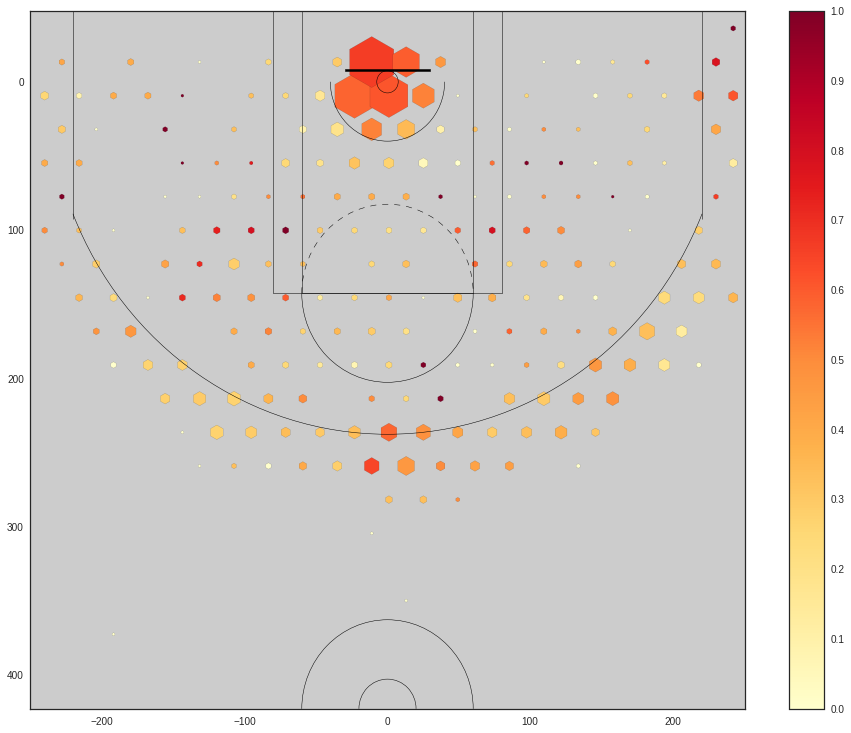

In [54]:
fig, ax = plt.subplots(figsize=(16,12.5))


scatter = ax.scatter(hex_coord.x, hex_coord.y, c=hex_coord.FGP,
                     s=10*(hex_coord.Shot_Count), cmap=plt.cm.YlOrRd,
                     alpha=1, marker='h', lw=0.1)
          
ax.set_ylim(422.5, -47.5)
ax.set_xlim(-250, 250)
nba.draw_court(ax, lw=0.5, color='black')
ax.patch.set_facecolor('gray')
ax.patch.set_alpha(0.4)
fig.colorbar(scatter)

plt.show()